# Functions
Throughout the previous Notebooks, we have been using ***functions*** provided by Python or by modules like `numpy` or `mobilechelonian`. Functions are one of the key features of programming languages that allow us to write complex programs. When we talk about functions in programming, we mean something more general than in mathematics.
A function is simply a piece of code that achieves a particular task, and is written in such a way that it can be ***called*** whenever that task needs to be done. One of the key skills in programming is splitting up a problem into smaller sub-problems (i.e. smaller problems) that can be solved by functions.
Because functions are used to solve sub-problems, functions are sometimes called "subroutines" in other programming languages.

Here's an example of how we can define a function to draw a square using a turtle.

In [1]:
def draw_square(turt):
    for i in range(4):
        turt.forward(100)
        turt.left(90)

In [2]:
from mobilechelonian import Turtle
raphael = Turtle()
raphael.speed(5)

draw_square(raphael) # call the function with argument terry

Turtle()

Let's look at what this means. The line `def draw_square(turt):` tells Python that we are defining a function which is called `draw_square` and has a single ***parameter*** called `turt`. This means that we will be able to ***call*** the function `draw_square` by passing a single ***argument*** like so: `draw_square(raphael)`. Inside the function, there will be a variable called `turt` which refers to `raphael`. You can think of `turt` being replaced by `raphael` wherever it is used.

The indented block of code
```
    for i in range(4):
        turt.forward(100)
        turt.left(90)
```
is called the ***body*** of the function. Whenever we call `draw_square`, the lines of code in the body are run, but `turt` will refer to whatever argument is given to the function. If we call `draw_square(raphael)` then you can think of the body of the `for` loop as being

```
    for i in range(4):
        raphael.forward(100)
        raphael.left(90)
```

Note that we could call `draw_square` with **any** single argument, like the number `3`.
Because it doesn't make sense to call `3.forward(100)` or `3.left(90)`, we would get a runtime error if we try to call `draw_square(3)`; see the optional aside at the end for more details.

So far this hasn't saved us any effort - we might as well have just written the code that draws the square like we did in previous Notebooks. The savings occur when we use the function more than once:

In [3]:
terry = Turtle()
terry.speed(5)

terry.pencolor("orange")     # anything terry draws will now be orange
draw_square(terry)

terry.right(90)

terry.pencolor("green")      # anything terry draws will now be green
draw_square(terry)

Turtle()

Having the function `draw_square` allowed us to draw two squares without repeating many lines of code. A common piece of advice is to write **DRY** code (Don't Repeat Yourself) not **WET** code (Write Everything Twice) - in other words, where you have to perform the same set of operations multiple times, write a function once and use it.

Functions have another major benefit, which makes them worth writing even if you only use them once. They are a natural way of splitting a problem into smaller parts, and they make it easier to test your code, since you can test each function individually. If you choose sensible function names, they also make your code easier to understand, since anyone reading your code can see what the function is supposed to accomplish. You don't need to read the code for the function `draw_square` to understand what the previous code cell should do.

## Fruitful functions

In the example above, the function `draw_square` "does something" - we give it an object and ask it to do something to that object. There is another use of functions, which we have seen before with `numpy`:

In [4]:
import numpy as np

np.sin(np.pi/2)

1.0

Here the function `np.sin` ***returns*** an answer. Here's how you return a value:

In [5]:
# returns the square of x
def square(x):
    return x ** 2

square(3)

9

Of course, `square` is not very useful - we could just write `3 ** 2` directly instead. Here's a more useful example - a function to represent the polynomial $f(x) = (2x-3)^3 - 10(2x -3) + 2$.

In [6]:
def f(x):
    y = 2*x - 3
    return y ** 3 - 10*y + 2

We will see more on plotting in a later Notebook, but it is now straightforward to plot `f`:

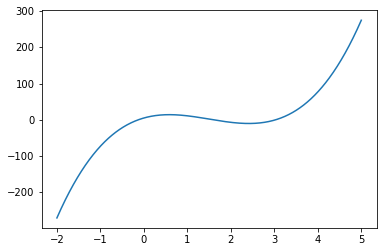

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt    # the standard plotting library

X = np.linspace(-2, 5, 1000)  # choose the points to evaluate f on
plt.plot(X, f(X))             # plot those points against the value of f
plt.show()                    # tells Python to produce the plot now

# We should also add axes labels, a title, and a legend - but we will
# leave that for now.

## Multiple arguments

Your functions can have more than one argument. For example, the polynomial in two variables $g(x, y) = 2x^2y + xy^2 + 3y^3$ could be represented like so:

In [8]:
def g(x, y):
    return 2*(x**2)*y + x*(y**2) + 3*(y**3)

It is important that when you call `g` you provide the arguments in the same order they are defined, so to evaluate $g$ at $(x = 1, y = 2)$ you should call

In [9]:
g(1, 2)

32

## Multiple return values

Strictly speaking, functions have at most one return value. However, that return value can be a ***tuple*** containing multiple things, and you can "unpack" the tuple into several variables after returning it. There is more on tuples later. For now, we consider the example of writing a Python function to represent the mathematical vector function

\\[ w(x, y) = \begin{pmatrix} x^2y + 3 \\ y^3 - 3x \end{pmatrix}. \\]

In [10]:
def w(x, y):
    return x**2 * y + 3, y**3 - 3*x     # returns a tuple of values

In [11]:
# the return value of w(2, 3) is a tuple:
w(2, 3)

(15, 21)

In [12]:
# get the first component of w(2, 3) as u, and the second component as v
u, v = w(2, 3)

In [13]:
u

15

In [14]:
v

21

## Invisible variables
One crucial fact about functions is that variables that are created inside functions cannot be accessed from the outside. The following code cell gives an error, because we try to access a variable that only exists inside the function `sum_of_sin_powers`. We instead should be using the value `sum_of_sin_powers(np.pi, 3)` directly, or storing it in a variable.

In [15]:
import numpy as np

# returns the sum of (1/n**2) for i from 1 to n
def sum_of_inverse_squares(n):
    sum_total = 0
    for i in range(1, n + 1):
        sum_total = sum_total + 1/(i**2)
    return sum_total

sum_of_inverse_squares(20)

1.5961632439130233

In [16]:
sum_total    # this doesn't work!

NameError: name 'sum_total' is not defined

You can think of functions as "black boxes": from the perspective of the rest of a program, precisely what goes on inside a function is invisible. The program simply feeds them some input (the arguments), the box does something, and then it may or may not give some output (a `return` value).

**Note:** while variables inside functions are hidden from the rest of the program, functions *can* access variables that exist in the rest of the program. If they modify those variables, the effects can be seen in the rest of the program (though whether or not the effect will be seen is a little complex). This can be very confusing, and it is usually better to have all of the information a function needs as parameters.

The principles governing when a given variable name is useable or not are called *scoping*, and for the moment we don't want you to get bogged down in them.

## Optional Aside 1: Member functions
When we tell a turtle to move forward by writing `turtle.forward(100)`, we are also calling a function. However, it looks different to calling `draw_square(turtle)` or `draw_pentagon(turtle)`. This is because `forward` is a *member* function of the `Turtle` *class*. In these notes we won't discuss these terms any further, other than to say that it would be possible to make `draw_square` into a member function and call it in the form `turtle.draw_square()`.

## Optional Aside 2: Duck typing

In many programming languages, we would have to declare what "type" of objects our function takes, and the language would not allow us to pass any arguments that do not match those types. Python is more permissive, and uses "duck typing". This follows the philosophy "if it walks like a duck, and quacks like a duck, it is a duck". 

Suppose we have written a function that is intended to take a `Duck` as its parameter `d`. Python will accept any argument (say, `bird`), and attempt to run the function. As long as the argument `bird` can do everything that the function asks the duck to do (e.g. `d.fly(somewhere)`), Python will be happy. But now suppose that the function also asks for `d.swim(somewhere)`, and this species of bird cannot swim (i.e. `bird` has no `swim` member function). At this point, Python will throw a runtime error.

## Optional Aside 3: Default Arguments

Sometimes you want to provide a sensible default value for an argument, so that someone using your function doesn't have to enter it. This happens with the function `range` - it has a default `start` value of 0 and `step` value of 1. Here's an example of how you would do this; note the `terms=10` in the function definition.

In [17]:
import math

# evaluate the MacLaurin series of sin at x
# defaults to 10 terms in the series
def sin_maclaurin(x, terms=10):
    total = 0
    for i in range(terms):
        term = (-1)**i * x**(2*i + 1)/math.factorial(2*i + 1)
        total += term
    return total

In [18]:
import numpy as np

# evaluate sin(5pi) using 10 terms
sin_maclaurin(5 * np.pi)

-169520.86600176583

In [19]:
# now use 20 terms for a more accurate value (still not great!)
sin_maclaurin(5 * np.pi, 20)

-0.288602305192303